In [1]:
import pandas as pd
import matplotlib .pyplot as plt
import plotly.express as px
import datetime
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('stations.csv')
df.head(10)


,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
5,AS001,"Railway Colony, Guwahati - APCB",Guwahati,Assam,Active
6,BR001,"Collectorate, Gaya - BSPCB",Gaya,Bihar,NaN
7,BR002,"SFTI Kusdihra, Gaya - BSPCB",Gaya,Bihar,NaN
8,BR003,"Industrial Area, Hajipur - BSPCB",Hajipur,Bihar,NaN
9,BR004,"Muzaffarpur Collectorate, Muzaffarpur - BSPCB",Muzaffarpur,Bihar,NaN


In [19]:
fig1=px.line(df,x="StationName",y="City",animation_frame="State")
fig1.show()

In [4]:
fig = px.bar(df, x="City", y="StationName",color="State", barmode="overlay")
fig.show()

In [10]:
print(df["State"])

0      Andhra Pradesh
1      Andhra Pradesh
2      Andhra Pradesh
3      Andhra Pradesh
4      Andhra Pradesh
            ...      
225       West Bengal
226       West Bengal
227       West Bengal
228       West Bengal
229       West Bengal
Name: State, Length: 230, dtype: object


In [11]:
df1=pd.read_csv('station_day.csv')
print(df.head())
df2=pd.read_csv('city_day.csv')
print(df.head())
df3=pd.read_csv('city_hour.csv')
print(df.head())

  StationId                                     StationName  \
0     AP001                  Secretariat, Amaravati - APPCB   
1     AP002  Anand Kala Kshetram, Rajamahendravaram - APPCB   
2     AP003                      Tirumala, Tirupati - APPCB   
3     AP004                 PWD Grounds, Vijayawada - APPCB   
4     AP005          GVM Corporation, Visakhapatnam - APPCB   

                City           State  Status  
0          Amaravati  Andhra Pradesh  Active  
1  Rajamahendravaram  Andhra Pradesh     NaN  
2           Tirupati  Andhra Pradesh     NaN  
3         Vijayawada  Andhra Pradesh     NaN  
4      Visakhapatnam  Andhra Pradesh  Active  
  StationId                                     StationName  \
0     AP001                  Secretariat, Amaravati - APPCB   
1     AP002  Anand Kala Kshetram, Rajamahendravaram - APPCB   
2     AP003                      Tirumala, Tirupati - APPCB   
3     AP004                 PWD Grounds, Vijayawada - APPCB   
4     AP005          GVM

In [12]:
dims=['StationId', 'StationName', 'City', 'State']
px.scatter_matrix(df)


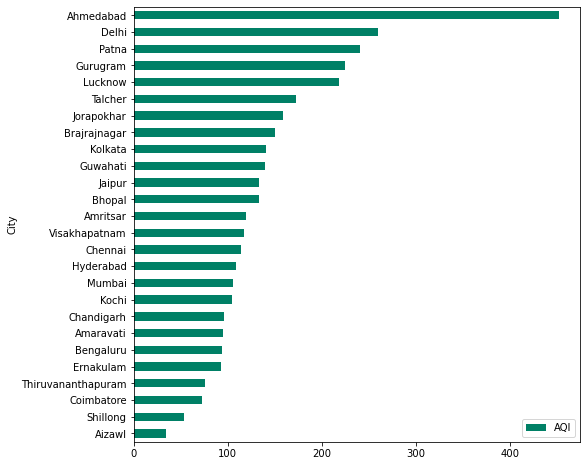

In [13]:
fig2=df2[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='barh',cmap='summer',figsize=(8,8))
plt.show()

In [14]:
df2.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


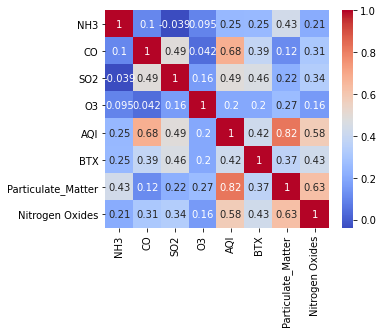

In [15]:
city_day = df2.copy()
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']
city_day['Nitrogen Oxides'] = city_day['NO']+city_day['NO2']+city_day['NOx']
city_day.drop(['Benzene','Toluene','Xylene','PM2.5','PM10','NO','NO2','NOx'],axis=1,inplace=True)

plt.figure(figsize=(5,4))
sns.heatmap(city_day.corr(),cmap='coolwarm',annot=True);

In [16]:
cities=city_day['City'].value_counts()
print('total number of cities in the dataset:',len(cities))
print(cities.index)

total number of cities in the dataset: 26
Index(['Delhi', 'Mumbai', 'Lucknow', 'Chennai', 'Ahmedabad', 'Bengaluru',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object')


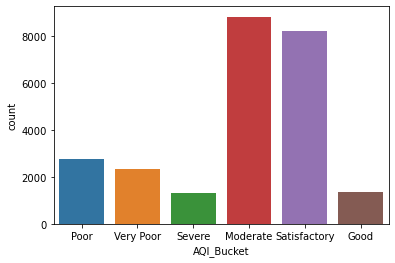

In [17]:
sns.countplot(city_day['AQI_Bucket'])

In [22]:

delhi_data=df2.groupby('City').get_group('Delhi')

In [23]:
delhi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [25]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [26]:
fig = px.line(delhi_data, x="Date", y="PM2.5")
fig.show()

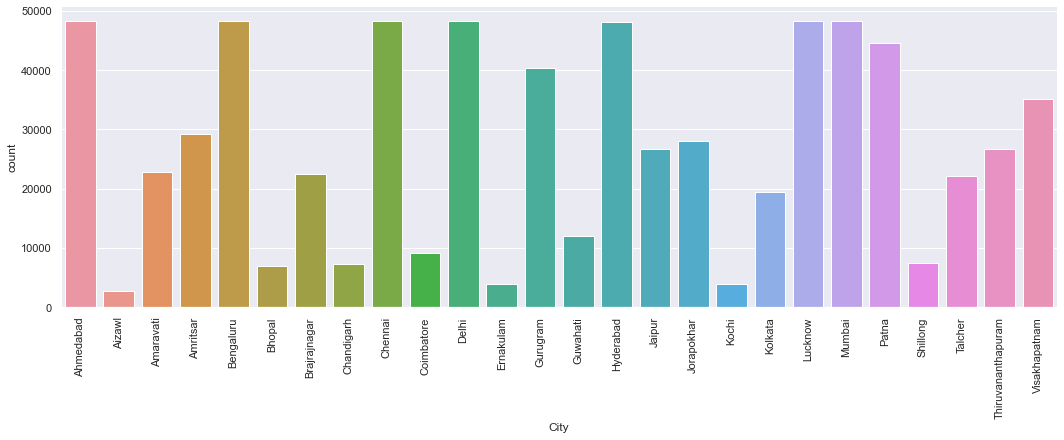

In [29]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df3,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

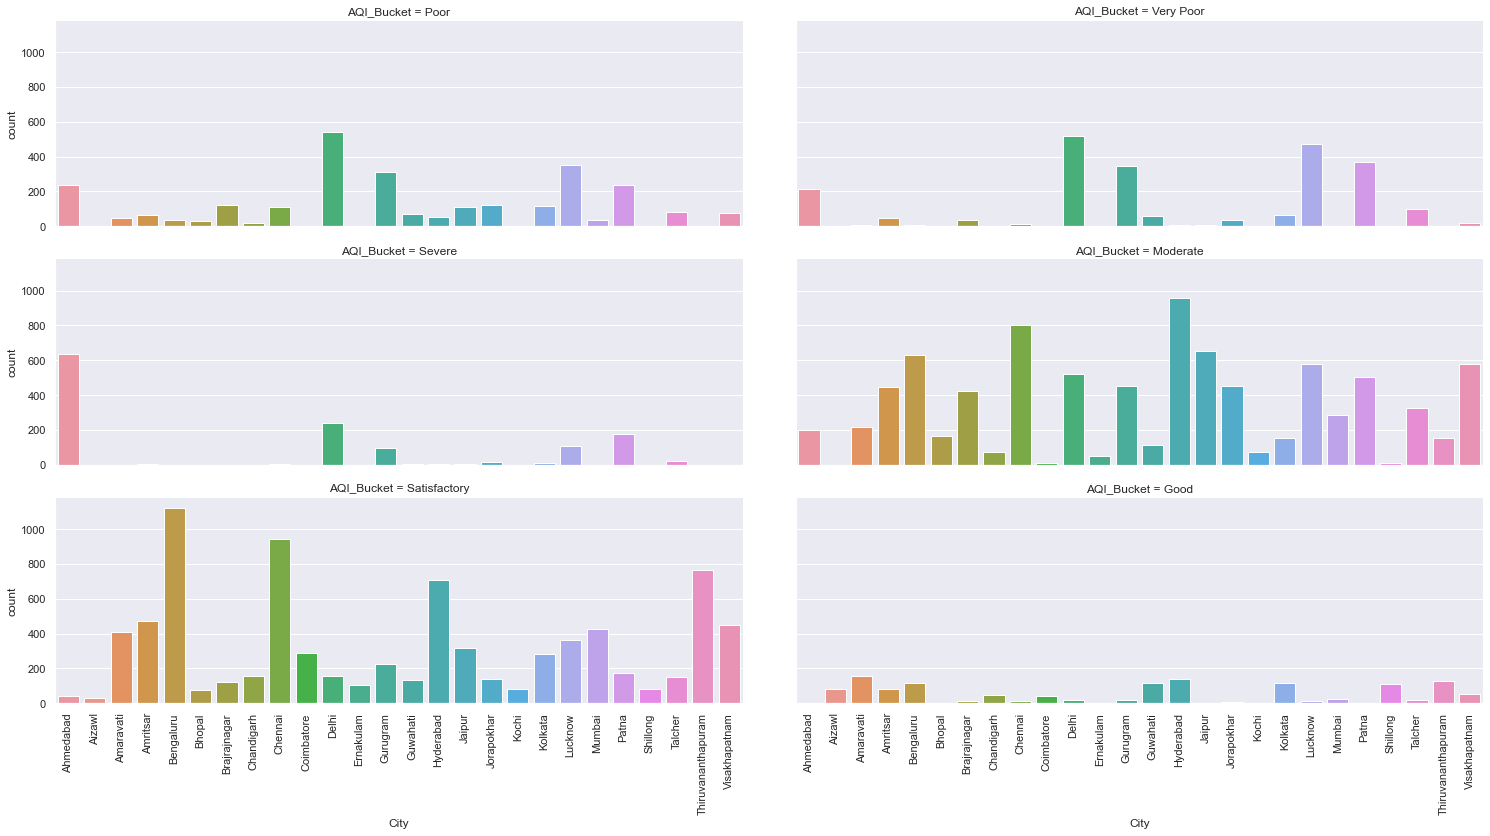

In [31]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df2,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

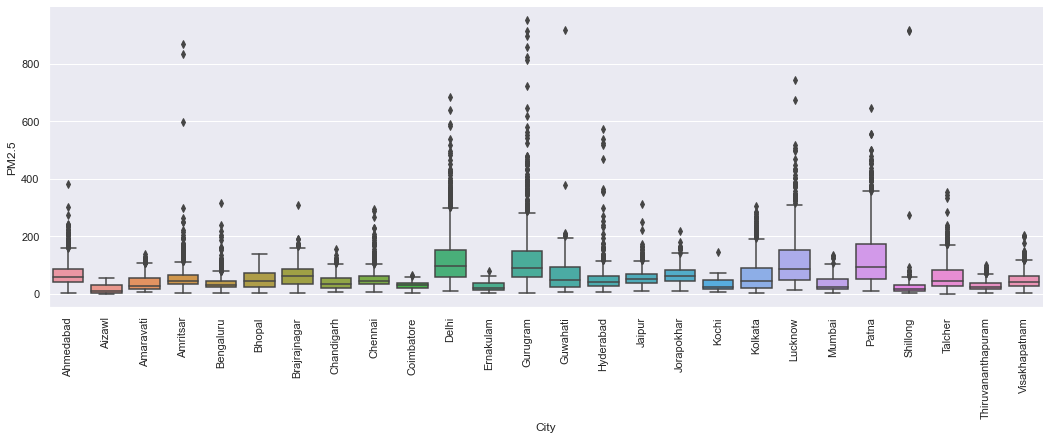

In [33]:
graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=df2,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

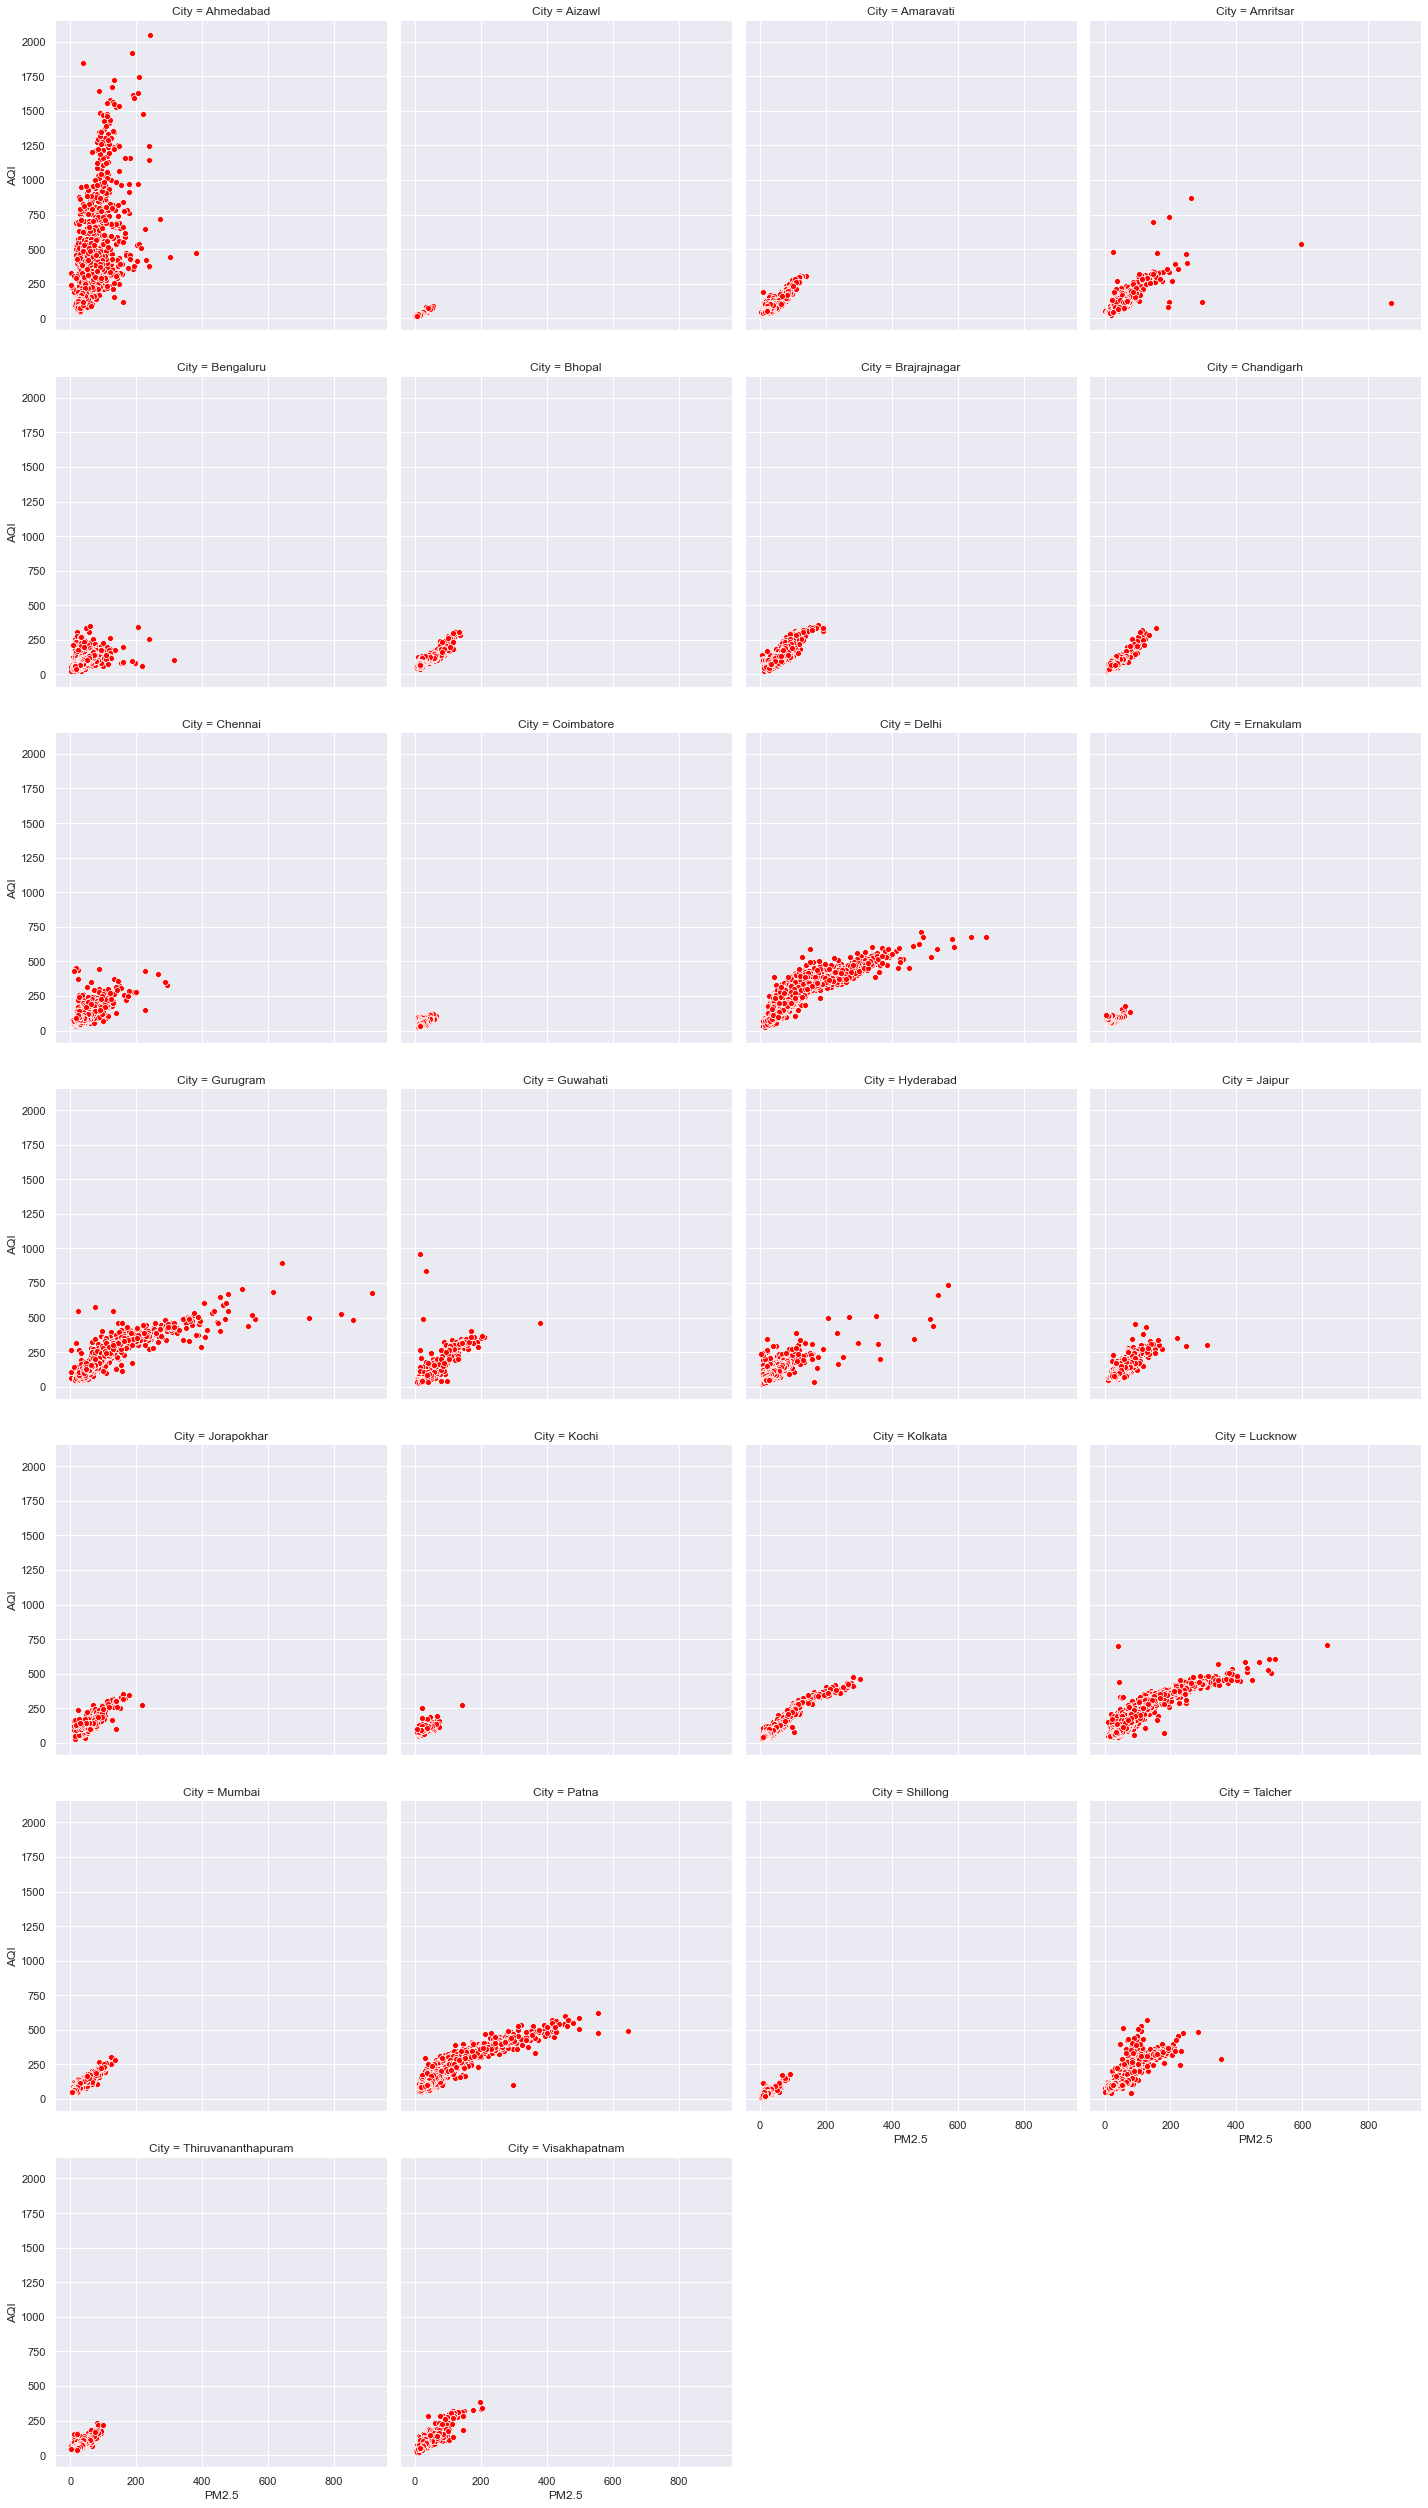

In [35]:
sns.relplot(x="PM2.5",y="AQI",kind="scatter",data=df2,col="City",col_wrap=4,color="red")